In [100]:
%reset -f

In [101]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

from math import sqrt

In [102]:
# loading the dataset
ds = pd.read_csv('data/vehicles.csv')

In [103]:
ds.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [104]:
# Kernel crashed a few times while trying to work with the whole dataset. Also it's boring to wait.
# I will work with the first 1% of the dataset and the code can be easily extented to work with the whole dataset
percantage = 0.01
working_ds = ds.head(int(len(ds) * percantage))

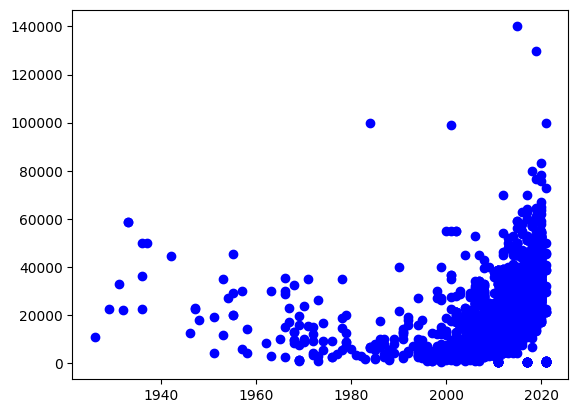

In [105]:
year_price_ds = working_ds.dropna(subset=['year', 'price'])
year_price_ds = year_price_ds[((year_price_ds['price'] < 200_000) & (year_price_ds['price'] > 100))]
plt.plot(year_price_ds['year'], year_price_ds['price'], 'bo')

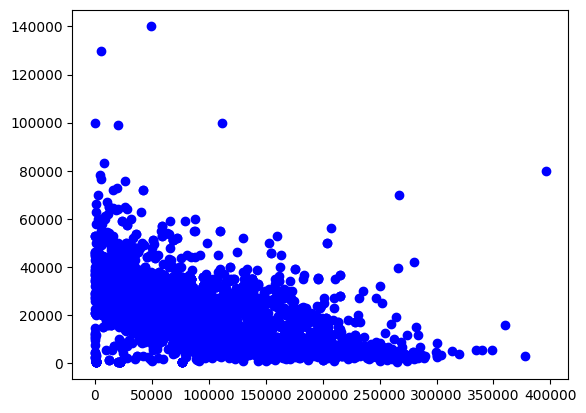

In [106]:
odometer_price_ds = working_ds.dropna(subset=['odometer', 'price'])
odometer_price_ds = odometer_price_ds[((odometer_price_ds['price'] < 200_000) & (odometer_price_ds['price'] > 100))]
odometer_price_ds = odometer_price_ds[(odometer_price_ds['odometer'] < 500_000)]
plt.plot(odometer_price_ds['odometer'], odometer_price_ds['price'], 'bo')

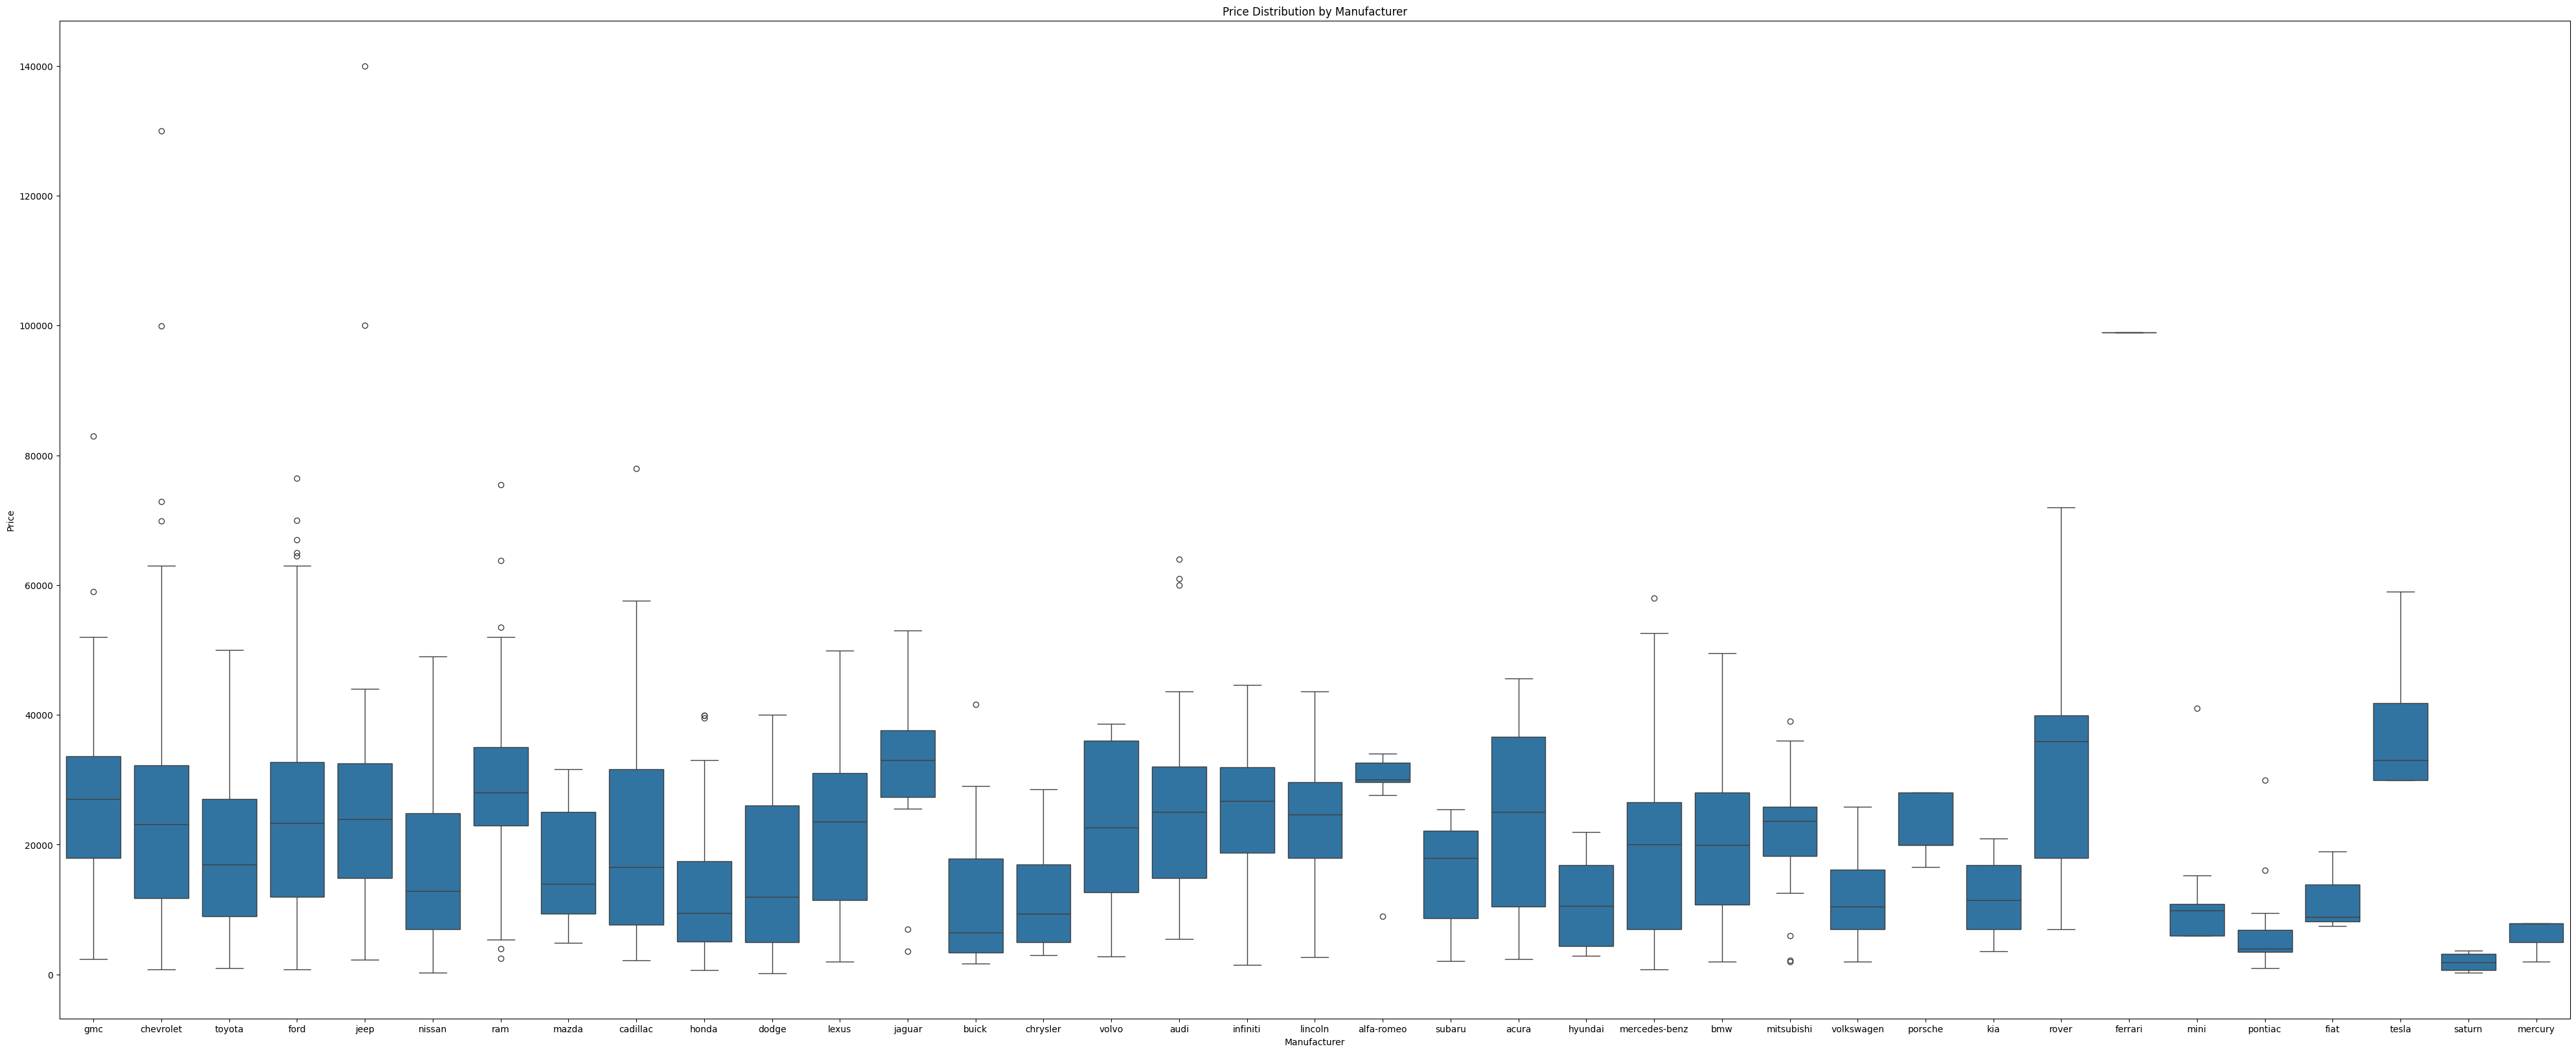

In [107]:
plt.figure(figsize=(50, 20))
manufacturer_price_ds = working_ds.dropna(subset=['manufacturer', 'price'])
manufacturer_price_ds = manufacturer_price_ds[((manufacturer_price_ds['price'] < 200_000) & (manufacturer_price_ds['price'] > 100))]
sns.boxplot(x='manufacturer', y='price', data=manufacturer_price_ds)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()


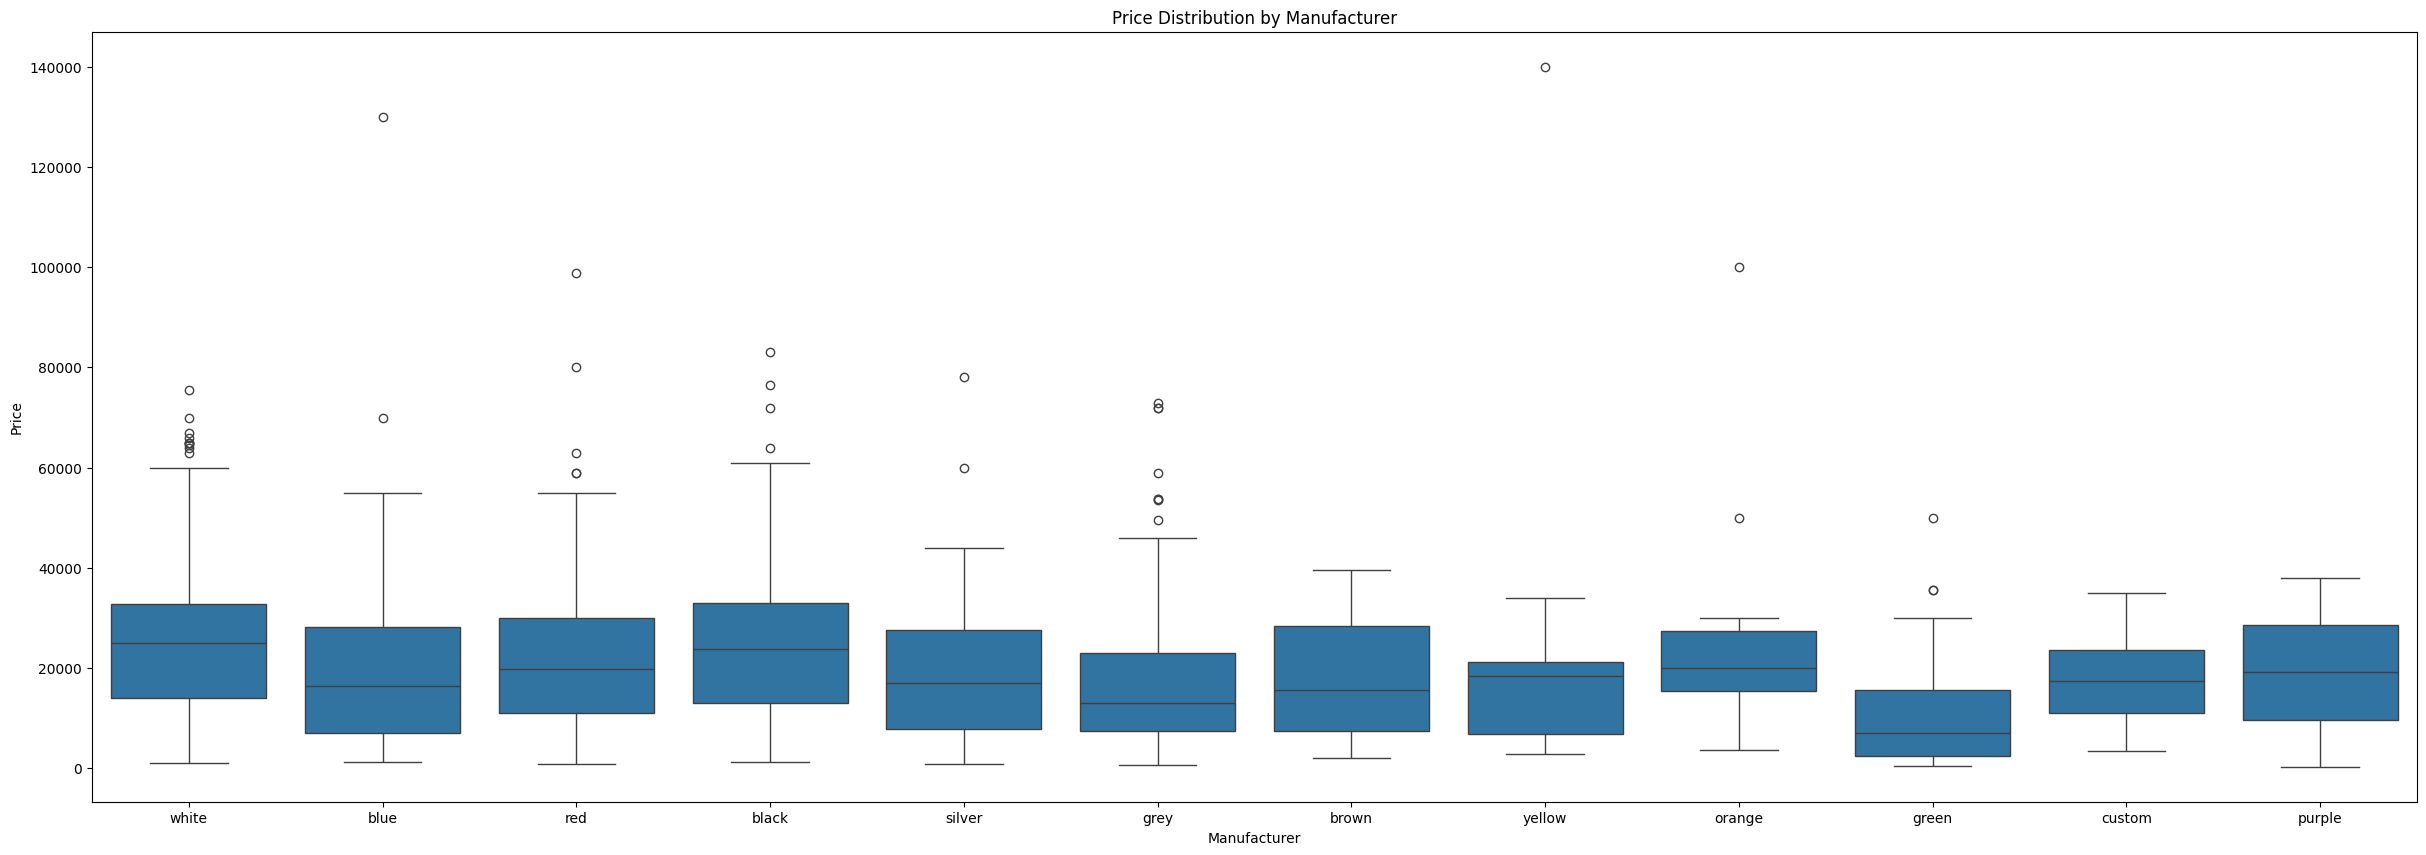

In [108]:
plt.figure(figsize=(30, 10))
color_price_ds = working_ds.dropna(subset=['paint_color', 'price'])
color_price_ds = color_price_ds[((color_price_ds['price'] < 200_000) & (color_price_ds['price'] > 100))]
sns.boxplot(x='paint_color', y='price', data=color_price_ds)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()


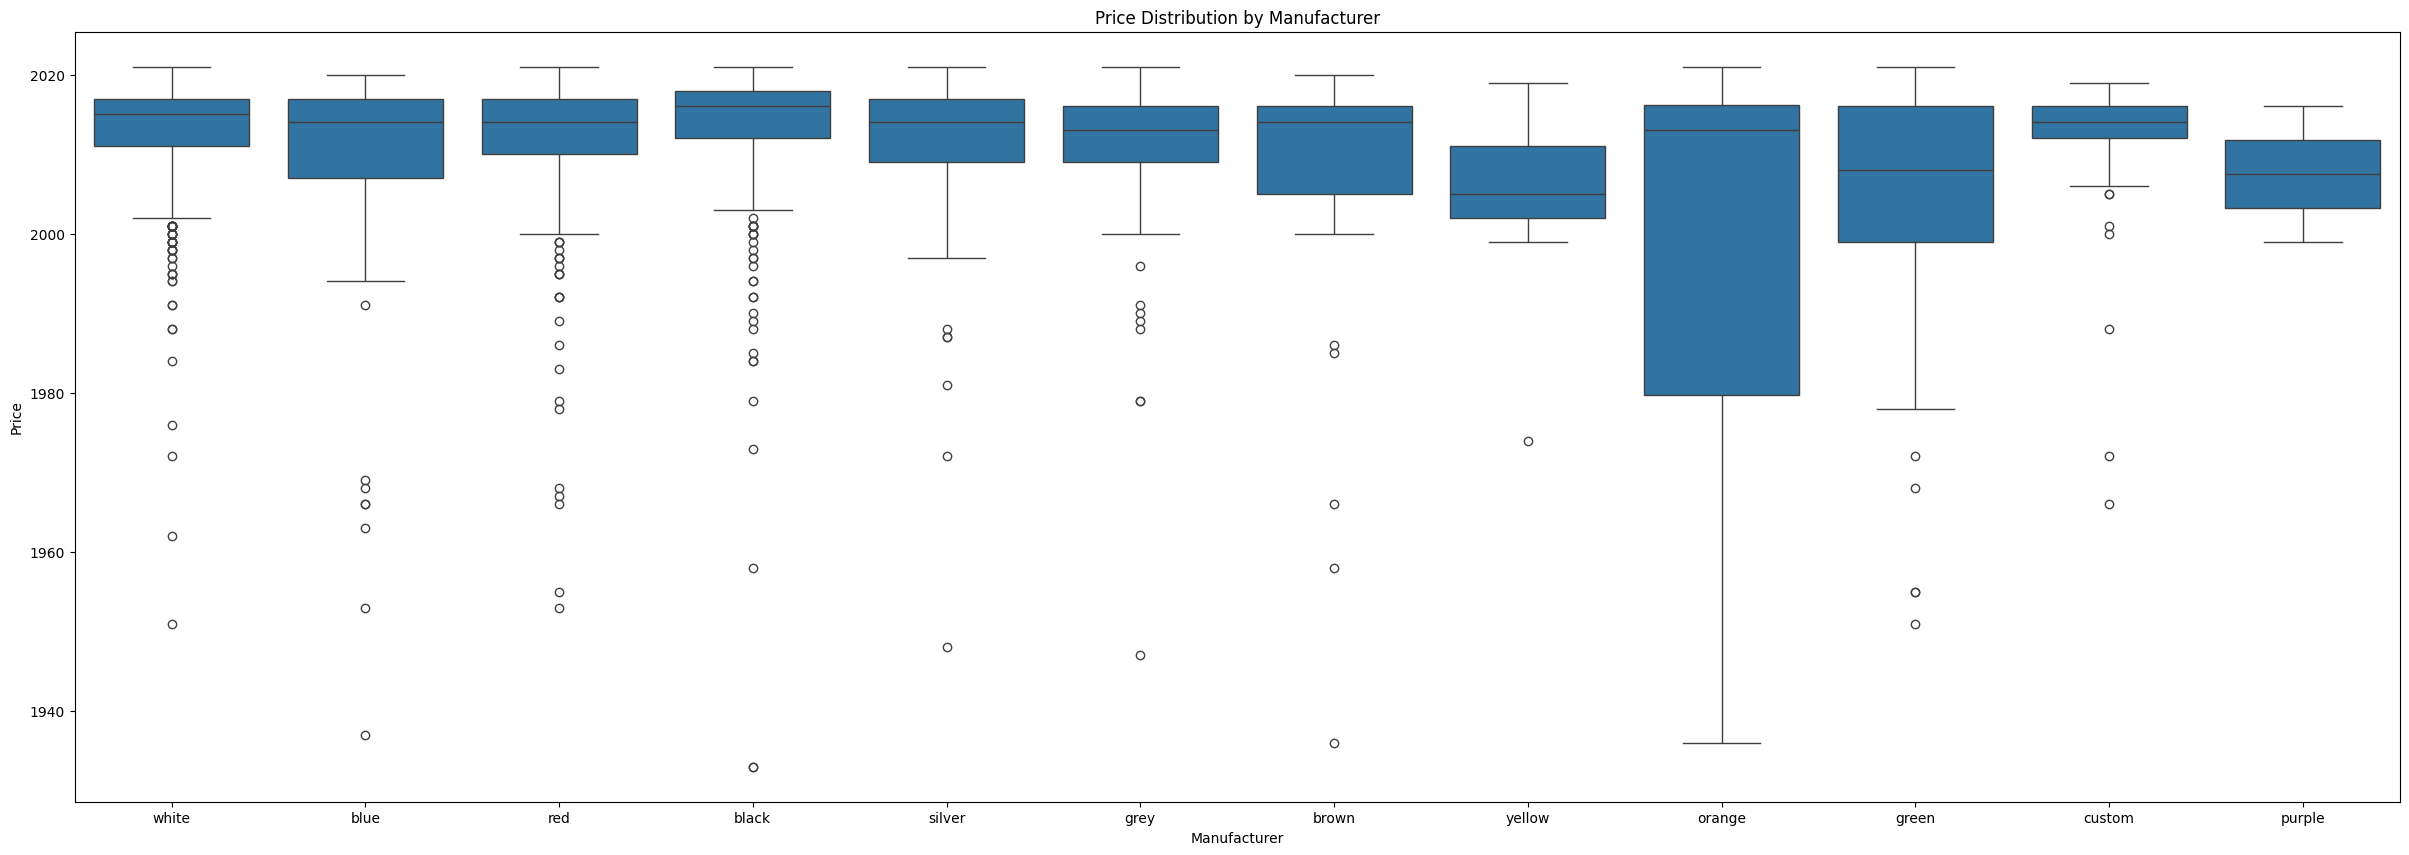

In [109]:
plt.figure(figsize=(30, 10))
color_year_ds = working_ds.dropna(subset=['paint_color', 'year'])
sns.boxplot(x='paint_color', y='year', data=color_year_ds)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

## The set of all manufacturers is: 

In [110]:

manufacturer_set = set(working_ds['manufacturer'].unique())
manufacturer_set

{'acura',
 'alfa-romeo',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'ferrari',
 'fiat',
 'ford',
 'gmc',
 'honda',
 'hyundai',
 'infiniti',
 'jaguar',
 'jeep',
 'kia',
 'lexus',
 'lincoln',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 nan,
 'nissan',
 'pontiac',
 'porsche',
 'ram',
 'rover',
 'saturn',
 'subaru',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo'}

## Is there a correlation between price and odometer in Ferrari cars?

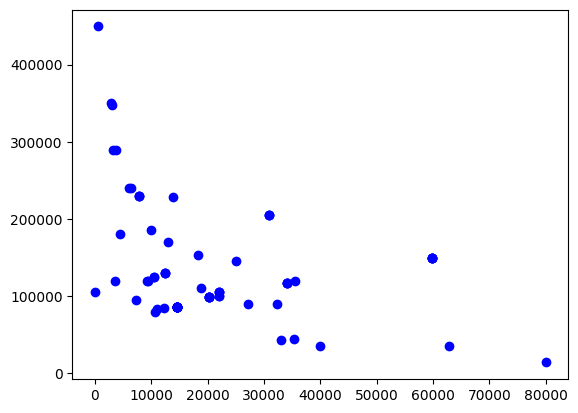

In [111]:
ferrari_ds = ds[(ds['manufacturer'] == 'ferrari')]
# We are using the whole dataset now, because the working_ds is too small of sample size for this example.

ferrari_ds = ferrari_ds[(ferrari_ds['odometer'] < 500_000)]
ferrari_ds = ferrari_ds[(ferrari_ds['price'] > 4000)]
plt.plot(ferrari_ds['odometer'], ferrari_ds['price'], 'bo')

# We can conclude that there is still a correlation between km drived and price even if the manufacturer is Ferrari.

## Correlation between year of manufacturing and price in infiniti cars:

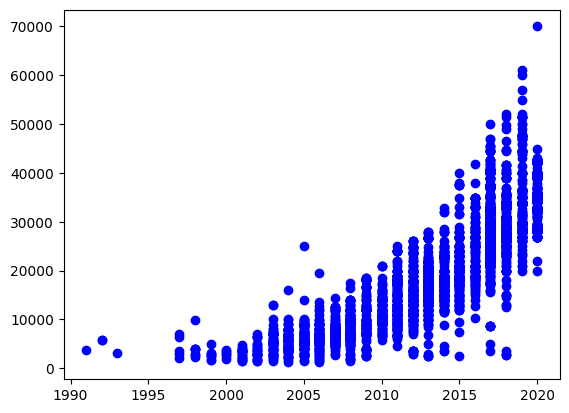

In [112]:
infiniti_set = ds[(ds['manufacturer'] == 'infiniti')]
infiniti_set = infiniti_set[(infiniti_set['price'] > 1000)]
plt.plot(infiniti_set['year'], infiniti_set['price'], 'bo')

## Showing the avarage price for every manufacturer: 

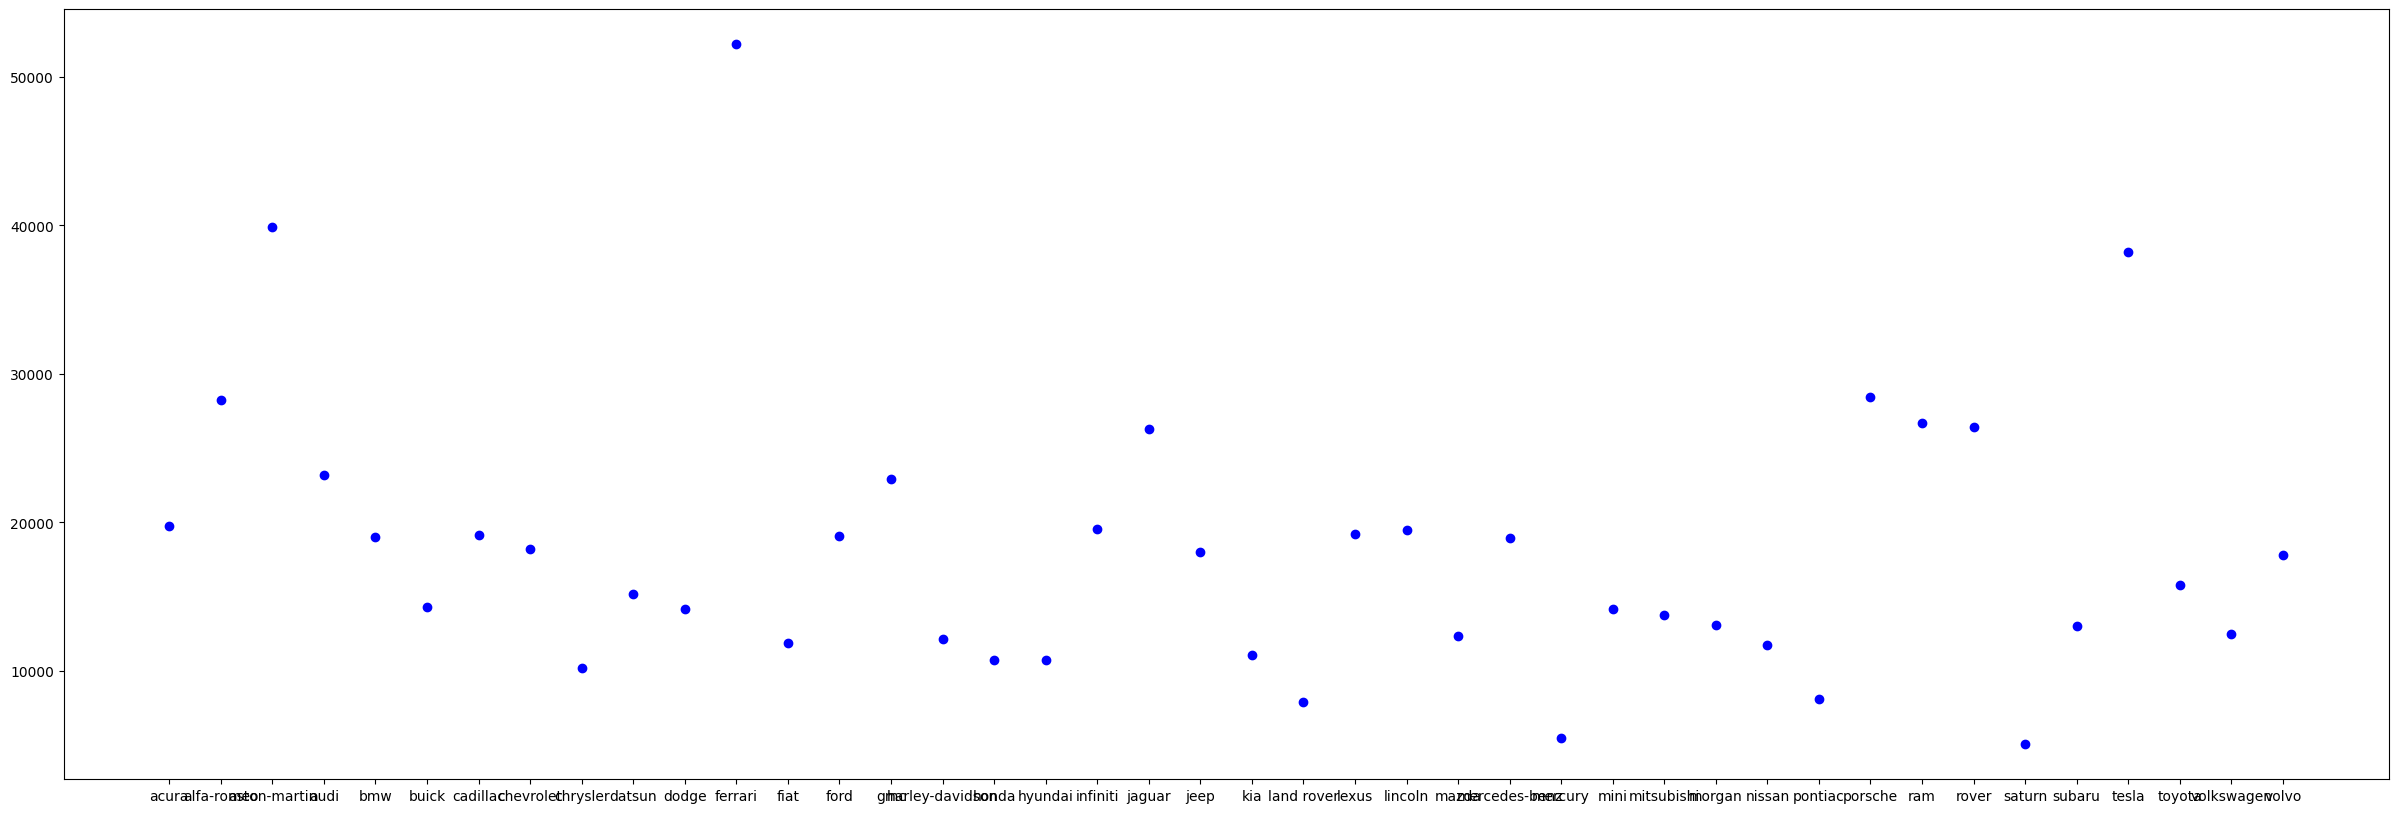

In [113]:
remove_end_point_price_ds = ds[ds['price'] < 100_000]
average_price_by_manufacturer = remove_end_point_price_ds.groupby('manufacturer')['price'].mean()

plt.figure(figsize=(30, 10))
plt.plot(average_price_by_manufacturer, 'bo')



## Showing the average price of cars with auto or manual transmission

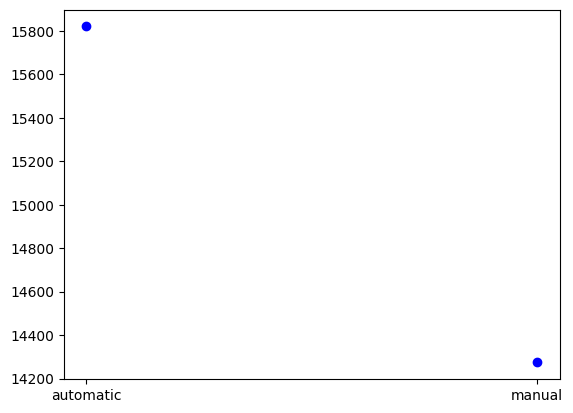

In [114]:
auto_manual_ds = ds[(ds['transmission'] == 'automatic') | (ds['transmission'] == 'manual')]
auto_manual_ds = auto_manual_ds[(auto_manual_ds['price'] < 300_000)]
average_by_transmission = auto_manual_ds.groupby('transmission')['price'].mean()
plt.plot(average_by_transmission, 'bo')

## Showing the average price for cars grouped by number of cylinders in the engine:

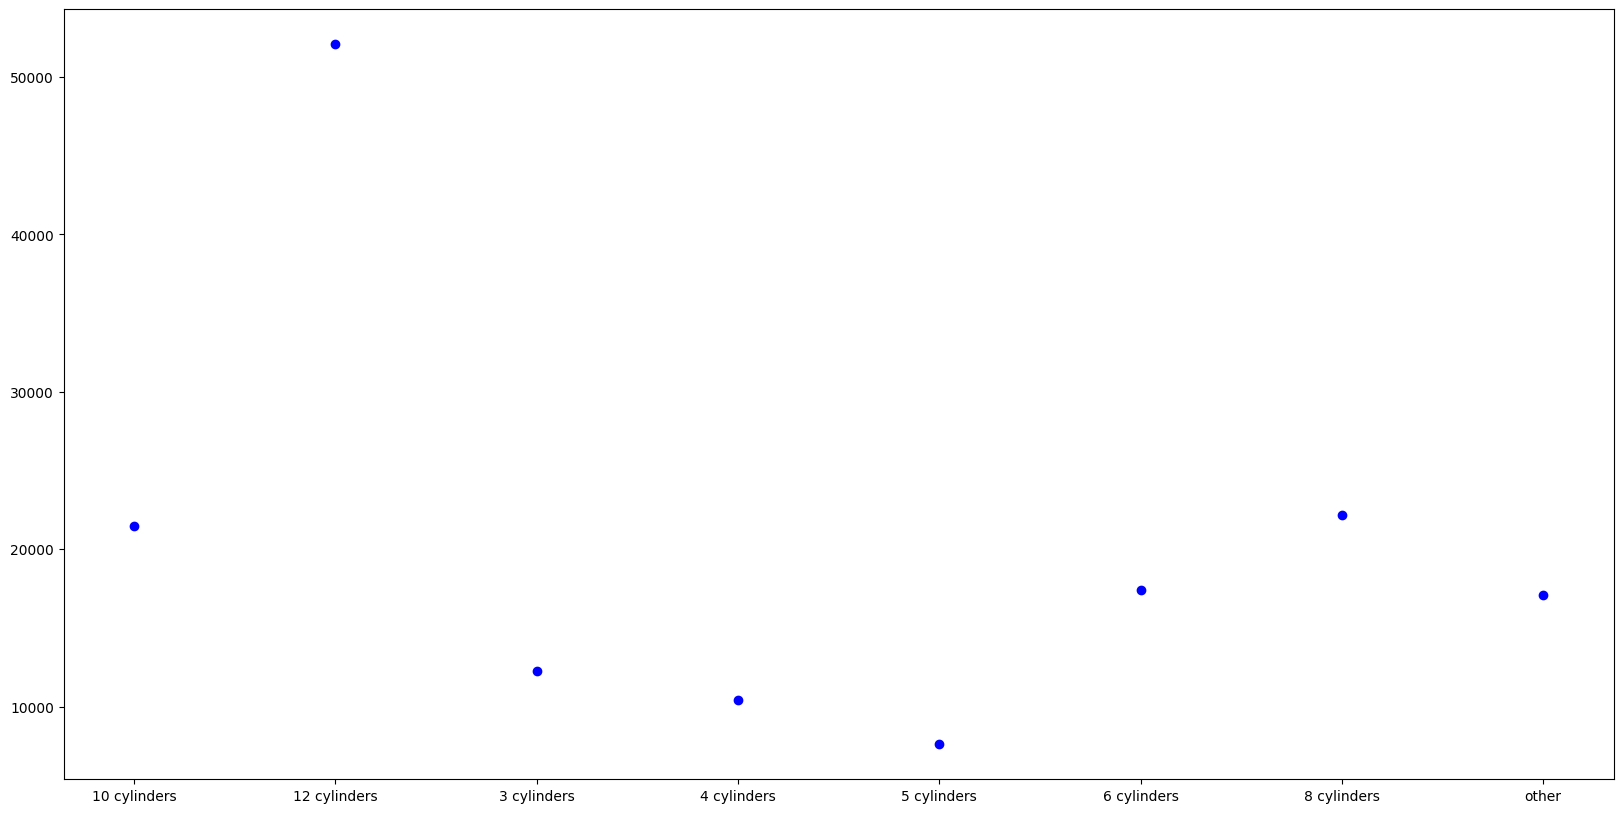

In [115]:
remove_end_point_price_ds = ds[ds['price'] < 300_000]
average_price_by_cylinder_count = remove_end_point_price_ds.groupby('cylinders')['price'].mean()

plt.figure(figsize=(20, 10))
plt.plot(average_price_by_cylinder_count, 'bo')


## Let's see which cars people drive the most:

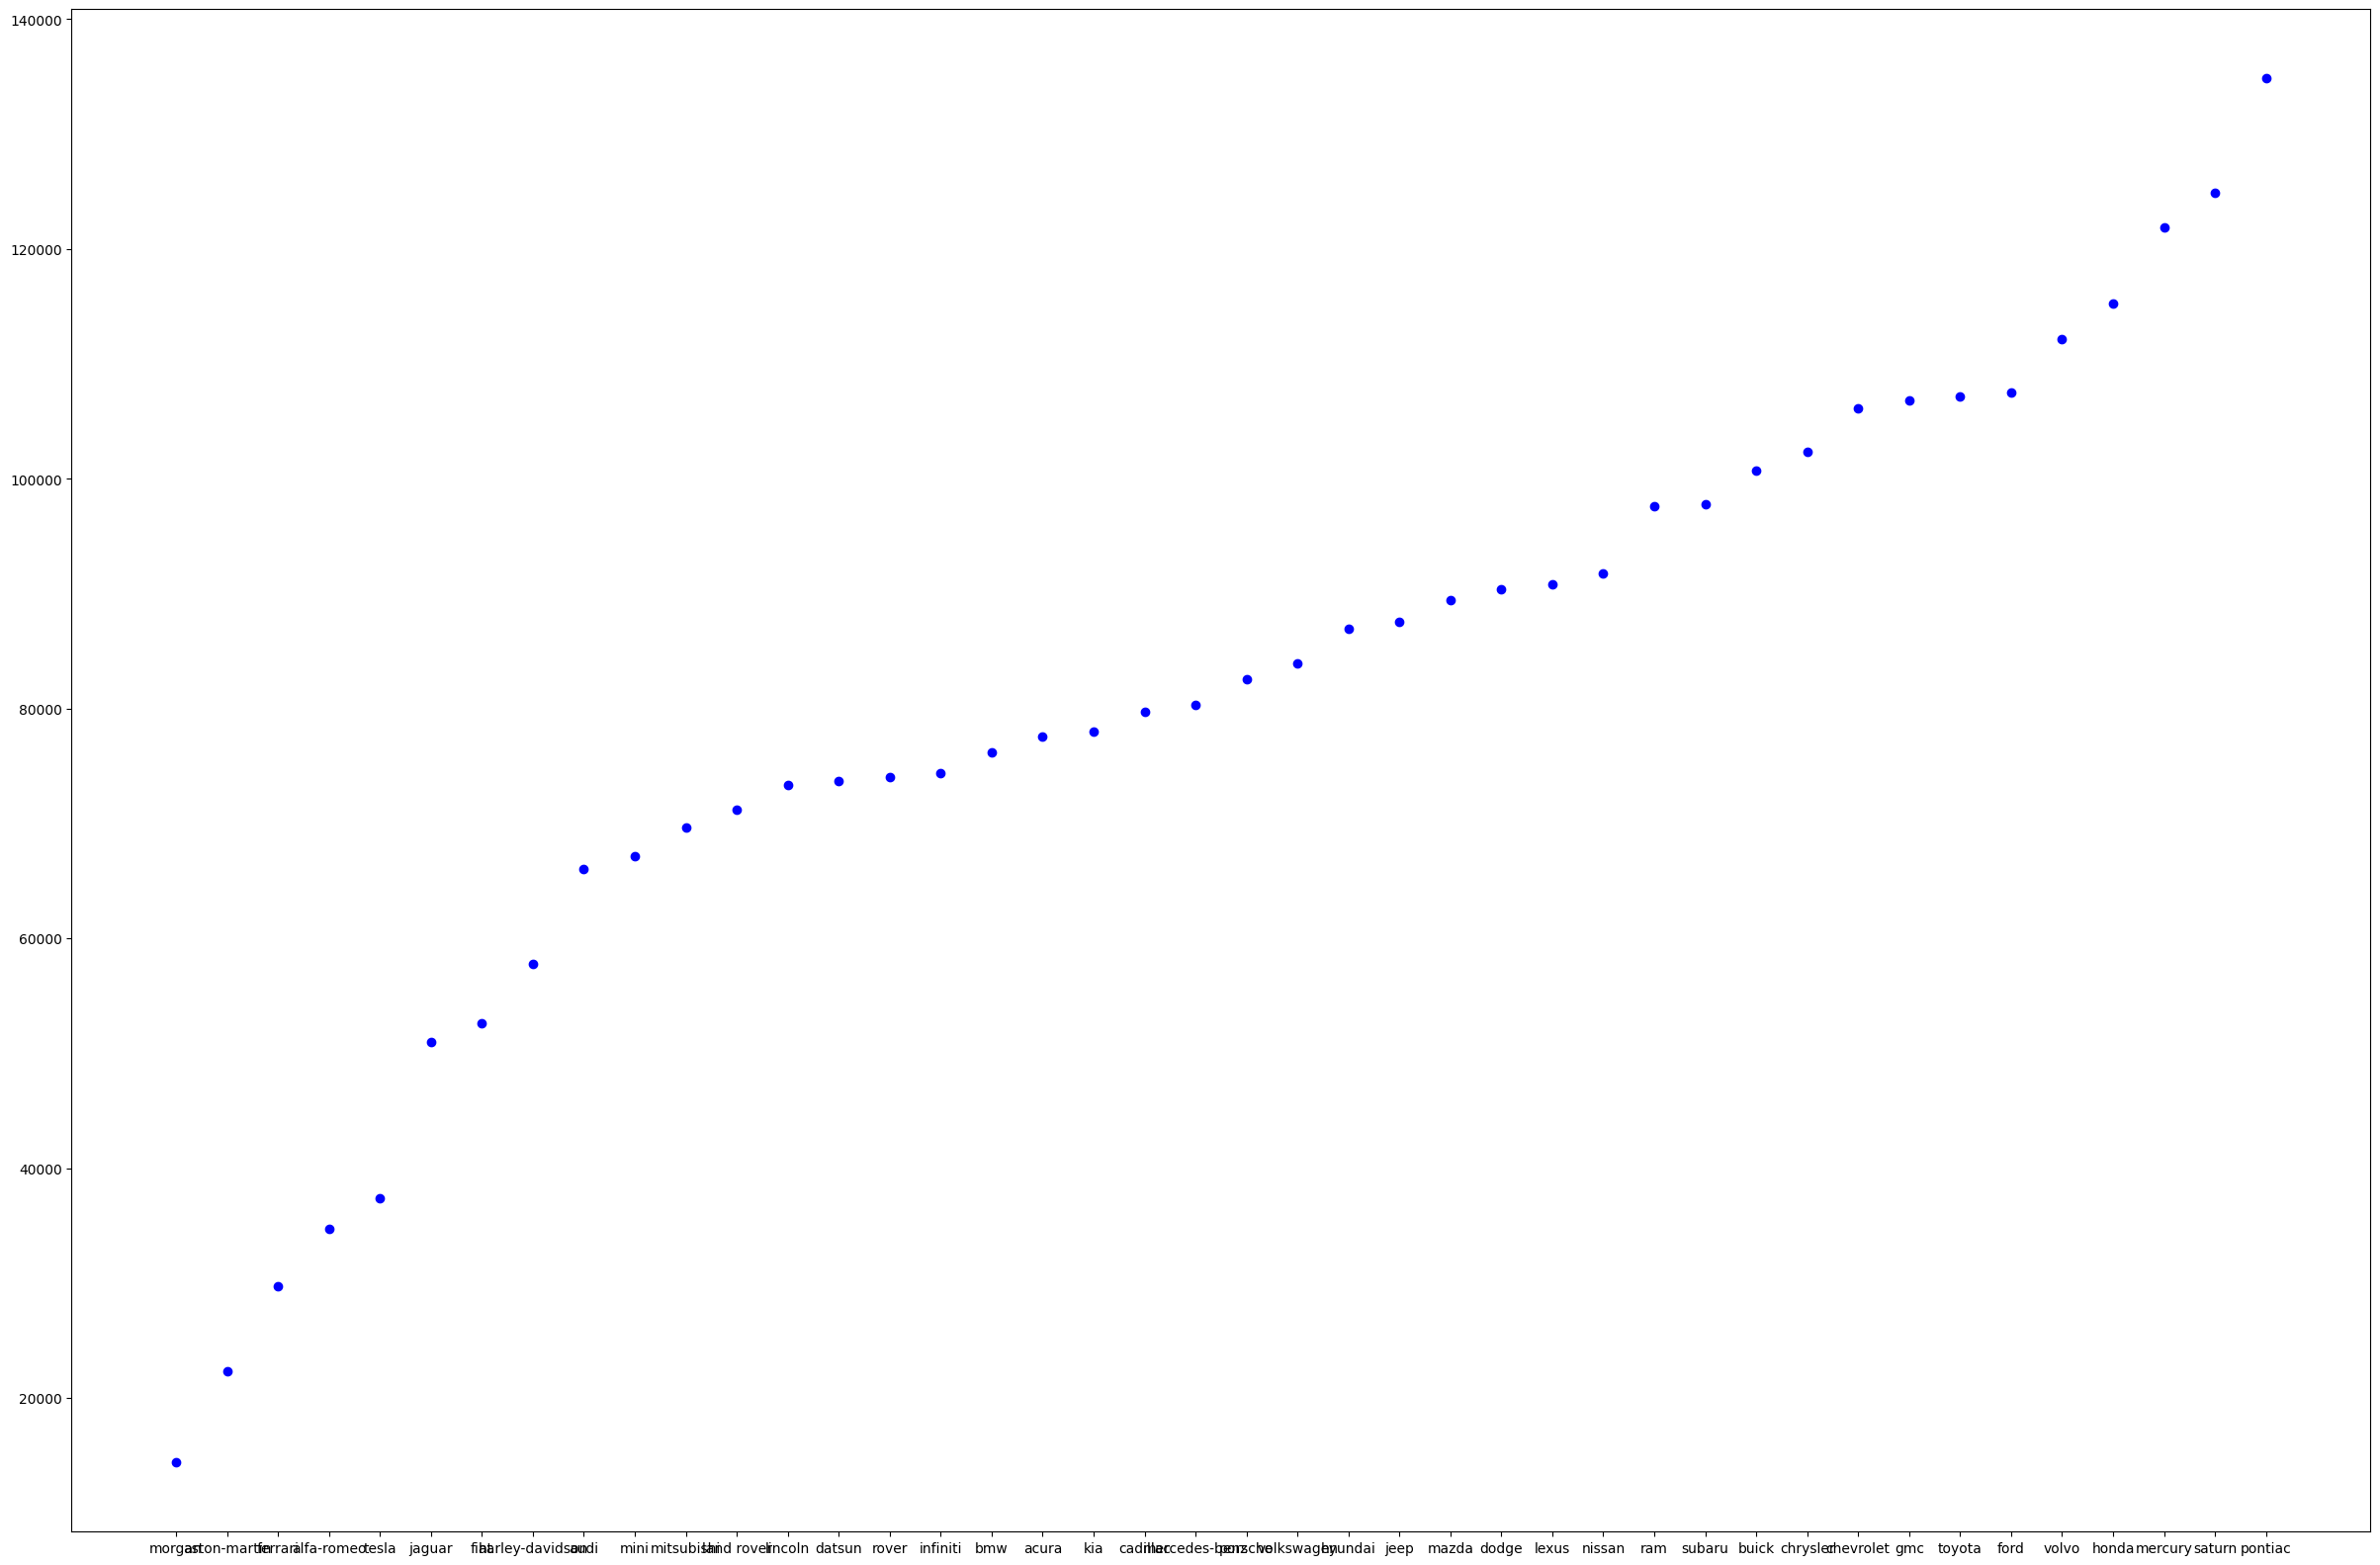

In [116]:
average_odometer_count_by_manufacturer_ds = ds.groupby('manufacturer')['odometer'].mean()
average_odometer_count_by_manufacturer_ds = average_odometer_count_by_manufacturer_ds.sort_values()

plt.figure(figsize=(30, 20))
plt.plot(average_odometer_count_by_manufacturer_ds, 'bo')

In [117]:
current_year = 2024
ds['average_kilometers_by_year'] = ds['odometer'] / (current_year - ds['year'])
ds['average_kilometers_by_year']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
426875    6445.200000
426876    3007.250000
426877    1043.500000
426878    5018.666667
426879    4543.200000
Name: average_kilometers_by_year, Length: 426880, dtype: float64

## Creating a linear regression model


In [118]:
lr = LinearRegression()
lr

LinearRegression()

## Converting cylinders column into a numeric column

In [125]:
ds['cylinders_numeric'] = ds['cylinders'].str.extract('(\d+)').astype(float)
ds = ds.dropna(subset=['year', 'odometer', 'cylinders_numeric'])
ds = ds[(ds['price'] < 300_000) & (ds['price'] > 1000)] 

## Creating the features

In [126]:
X = ds[['year', 'odometer', 'cylinders_numeric']]
y = ds['price']

## Splitting the dataset into a training and test sets

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, y_train

(          year  odometer  cylinders_numeric
 312959  2002.0  155710.0                4.0
 314118  2007.0  153000.0                6.0
 184827  2003.0  160000.0                6.0
 217107  2011.0  187000.0                8.0
 61194   2007.0  104500.0                4.0
 ...        ...       ...                ...
 228829  2020.0     392.0                6.0
 197528  2011.0   99000.0                6.0
 250865  2009.0   72789.0                8.0
 279283  2009.0  179510.0                8.0
 232495  2012.0       1.0                6.0
 
 [132928 rows x 3 columns],
 312959     3000
 314118     8900
 184827     2650
 217107    10999
 61194      4200
           ...  
 228829    68900
 197528    11000
 250865    24990
 279283     6000
 232495     2500
 Name: price, Length: 132928, dtype: int64)

## Training the model

In [130]:
lr.fit(X_train, y_train)

LinearRegression()

## Making the predictions

In [131]:
predictions = lr.predict(X_test)
predictions

array([19549.68465893, 22204.88665578, 16990.85434542, ...,
       19519.95550924, 10919.81250858, 24225.40861637])

## MAE:

In [136]:
mean_absolute_error(predictions, y_test)

8560.447586809429

## MSE:

In [137]:
mean_squared_error(predictions, y_test)

158599395.31594166

## RMSE:

In [138]:
root_mean_squared_error(predictions, y_test)

12593.625185622353

## Coefficients are:

In [139]:
lr.coef_

array([ 5.56028018e+02, -1.30610121e-02,  3.81154032e+03])

### Interpreting the coefficients:
- first coefficient is possitive which means that when the year is greater (the car is newer) the price of the car increases
- second coefficient is negative which means that when the the lower the odometer count the lower the price
- third coefficient is also positive which means that price grows when number of cylinders grows

### To be honest I don't know if the model is bad or not? How can I do it better?